# Programming Assignment - 5
---
## Name: Samruth Vennapusala
---

In [1]:
# Import required packages
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import roc_auc_score, roc_curve, auc, recall_score, precision_score, f1_score
from sklearn import svm, datasets

## Question 1
---
Use your understanding of singular value decomposition and recommendation systems (from your last reading) to build a basic movie recommendation system. 

>- Evaluate your system on the test data (20%) and present the statistics (precision, recall and F1-score).  

Use the following data set https://grouplens.org/datasets/movielens/100k/. 

In [2]:
test_data_path = r'C:/Users/samru/Desktop/ml-100k/ml-100k/u1.test'
test_data = pd.io.parsers.read_csv(test_data_path, names=['user_id', 'movie_id', 'rating', 'timestamp'],engine='python', delimiter='\t')

print(test_data)

       user_id  movie_id  rating  timestamp
0            1         6       5  887431973
1            1        10       3  875693118
2            1        12       5  878542960
3            1        14       5  874965706
4            1        17       3  875073198
...        ...       ...     ...        ...
19995      458       648       4  886395899
19996      458      1101       4  886397931
19997      459       934       3  879563639
19998      460        10       3  882912371
19999      462       682       5  886365231

[20000 rows x 4 columns]


In [3]:
# Your code comes here
data_path = r'C:/Users/samru/Desktop/ml-100k/ml-100k/u.data'
data = pd.io.parsers.read_csv(data_path, names=['user_id', 'movie_id', 'rating', 'timestamp'],engine='python', delimiter='\t')

print(data)

       user_id  movie_id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]


In [4]:

genre_data = pd.io.parsers.read_csv(r'C:/Users/samru/Desktop/ml-100k/ml-100k/u.item',encoding = "ISO-8859-1",
                                    names=['movie_id', 'movie_title' , 'release_date' , 'video_release_date' ,
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery', 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western'],
                                    engine='python', delimiter='|')

print(genre_data)

      movie_id                                movie_title release_date  \
0            1                           Toy Story (1995)  01-Jan-1995   
1            2                           GoldenEye (1995)  01-Jan-1995   
2            3                          Four Rooms (1995)  01-Jan-1995   
3            4                          Get Shorty (1995)  01-Jan-1995   
4            5                             Copycat (1995)  01-Jan-1995   
...        ...                                        ...          ...   
1677      1678                          Mat' i syn (1997)  06-Feb-1998   
1678      1679                           B. Monkey (1998)  06-Feb-1998   
1679      1680                       Sliding Doors (1998)  01-Jan-1998   
1680      1681                        You So Crazy (1994)  01-Jan-1994   
1681      1682  Scream of Stone (Schrei aus Stein) (1991)  08-Mar-1996   

      video_release_date                                           IMDb URL  \
0                    NaN  http:/

In [5]:
ratings_mat = np.ndarray(
    shape=(np.max(data.movie_id.values), np.max(data.user_id.values)),
    dtype=np.uint8)
ratings_mat[data.movie_id.values-1, data.user_id.values-1] = data.rating.values

100000

In [6]:
ratings_test_mat = np.ndarray(
    shape=(np.max(test_data.movie_id.values), np.max(test_data.user_id.values)),
    dtype=np.uint8)
ratings_test_mat[test_data.movie_id.values-1, test_data.user_id.values-1] = test_data.rating.values

In [7]:
normalised_mat = ratings_mat - np.asarray([(np.mean(ratings_mat, 1))]).T

In [8]:
A = normalised_mat.T / np.sqrt(ratings_mat.shape[0] - 1)
U, S, V = np.linalg.svd(A)

In [34]:
def top_cosine_similarity(data, movie_id, top_n=10):
    index = movie_id - 1 # Movie id starts from 1 in the dataset
    movie_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

In [35]:
def print_similar_movies(genre_data, movie_id, top_indexes):
    print('Recommendations for {0}: \n'.format(
    genre_data[genre_data.movie_id == movie_id].movie_title.values[0]))
    for id in top_indexes + 1:
        print(genre_data[genre_data.movie_id == id].movie_title.values[0])

In [40]:
k = 50
movie_id = 1 # (getting an id from movies.dat)
top_n = 10
sliced = V.T[:, :k] # representative data
indexes = top_cosine_similarity(sliced, movie_id, top_n)

In [41]:
print_similar_movies(genre_data, movie_id, indexes)

Recommendations for Toy Story (1995): 

Toy Story (1995)
Hercules (1997)
Jerry Maguire (1996)
Hunchback of Notre Dame, The (1996)
Dumbo (1941)
Matilda (1996)
Aladdin (1992)
Close Shave, A (1995)
Beauty and the Beast (1991)
I Don't Want to Talk About It (De eso no se habla) (1993)


In [69]:
y_test = ratings_test_mat[0:1000]
y_train= ratings_mat[0:1000]

m = MultiLabelBinarizer().fit(y_train)


Precision = precision_score(m.transform(y_test), m.transform(y_train), average='macro') 
Recall = recall_score(m.transform(y_test), m.transform(y_train), average='macro')
F1 = f1_score(m.transform(y_test), m.transform(y_train), average='macro') 

print("Precision: ", Precision)
print("Recall: ", Recall)
print("F1 Score: ", F1)


Precision:  0.984472104519774
Recall:  0.9473570407269037
F1 Score:  0.9651321853091003


## Question 2
---
Use the Python code for image compression to compress the national flags of different countries of your choice. The index of the smallest singular value above an $\epsilon$ threshold as defined below gives the numerical rank. Pick any 5 national flags and arrange them in the order of decreasing numerical rank.

numerical rank = smallest $r$ such that $\frac{\sigma_r}{\sigma_1} > \epsilon$

For example, use $\epsilon = 0.001$.

In [44]:
# Your code comes here
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [21]:

epsilon = .001


czech_flag_path = r'C:/Users/samru/Desktop/flagimg/Czech-flag.jpg'
denmark_flag_path = r'C:/Users/samru/Desktop/flagimg/Flag_of_Denmark.jpg'
finland_flag_path = r'C:/Users/samru/Desktop/flagimg/Flag-Finland.jpg'
norway_flag_path = r'C:/Users/samru/Desktop/flagimg/Flag-Norway.jpg'
sweden_flag_path = r'C:/Users/samru/Desktop/flagimg/swedens-flag.jpg'

czech_flag = mpimg.imread(czech_flag_path)
denmark_flag = mpimg.imread(denmark_flag_path)
finland_flag = mpimg.imread(finland_flag_path)
norway_flag = mpimg.imread(norway_flag_path)
sweden_flag = mpimg.imread(sweden_flag_path)

labels = ["Czech","Denmark","Finland","Norway","Sweden"]
flag_list = [czech_flag,denmark_flag,finland_flag,norway_flag,sweden_flag]


Czech


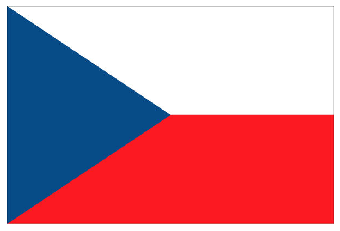

Denmark


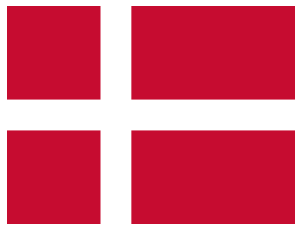

Finland


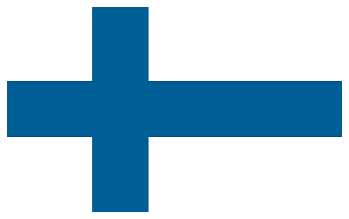

Norway


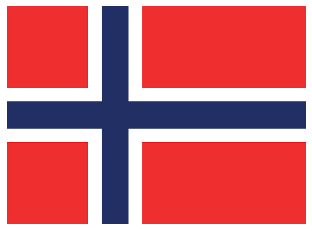

Sweden


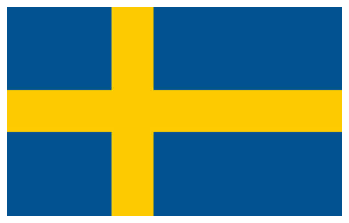

In [24]:
for i in range(len(labels)):
    plt.axis('off')
    print(labels[i])
    plt.imshow(flag_list[i])
    plt.show()


In [25]:
def rgb_svd_image(pix):
    pix_rgb = pix/255.0;
    U0,S0,V0 = np.linalg.svd(pix_rgb[...,0]);
    U1,S1,V1 = np.linalg.svd(pix_rgb[...,1]);
    U2,S2,V2 = np.linalg.svd(pix_rgb[...,2]);
    pix_compressed = np.zeros_like(pix_rgb);
    k=25
    pix_compressed[...,0] = np.dot(U0[:,:k], V0[:k,:]*S0[:k].reshape(k,1));
    pix_compressed[...,1] = np.dot(U1[:,:k], V1[:k,:]*S1[:k].reshape(k,1));
    pix_compressed[...,2] = np.dot(U2[:,:k], V2[:k,:]*S2[:k].reshape(k,1));
    return pix_compressed
    

In [28]:
compressed_images = []
length = len(flag_list)
print(length)
for i in range (0,length):
    pix = rgb_svd_image(flag_list[i])
    compressed_images.append(pix)

5


In [29]:
def rank_compressed_images(flag_list,labels):
    curr_rmax = 0
    curr_sig_min = 1E9
    curr_sig_r = 0
    
    flag_order = []
    i = 0
    for image in flag_list:

        pix_rgb = image/255.0;
        U0,S0,V0 = np.linalg.svd(pix_rgb[...,0]);
        U1,S1,V1 = np.linalg.svd(pix_rgb[...,1]);
        U2,S2,V2 = np.linalg.svd(pix_rgb[...,2]);
        if (np.max(S0) > curr_rmax):
            curr_rmax = np.max(S0)
        elif (np.max(S1) > rmax):
            curr_rmax = np.max(S1)
        elif (np.max(S2) > rmax):
            curr_rmax = np.max(S2)
        if (np.min(S0) < curr_sig_min):
            curr_sig_min = np.min(S0)
        elif (np.min(S1) < curr_sig_min):
            curr_sig_min = np.min(S1)
        elif (np.min(S2) < curr_sig_min):
            curr_sig_min = np.min(S2)
        curr_sig_r = curr_sig_min/curr_rmax

        if (curr_sig_r < epsilon):
          flag_order.append(curr_sig_r)
        curr_rmax = 0
        curr_sig_min = 1E9
        curr_sig_r = 0
    return(flag_order)

flag_order = rank_compressed_images(flag_list,labels)
print(flag_order)

[9.336071789521376e-17, 7.763175428787542e-17, 9.989462133570918e-17, 6.23806398687991e-17, 4.435125269756673e-17]


In [30]:
def merge(list1, list2,  list3):
      
    merged_list = tuple(zip(list1, list2,list3)) 
    return merged_list

In [32]:

print(flag_order)

order_array = merge(flag_order,labels,compressed_images)
ordered = sorted(order_array)

print(ordered[0][1])
print(ordered[1][1])
print(ordered[2][1])
print(ordered[3][1])
print(ordered[4][1])

[9.336071789521376e-17, 7.763175428787542e-17, 9.989462133570918e-17, 6.23806398687991e-17, 4.435125269756673e-17]
Sweden
Norway
Denmark
Czech
Finland


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


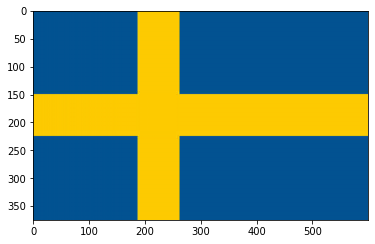

In [37]:
plt.imshow(ordered[0][2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


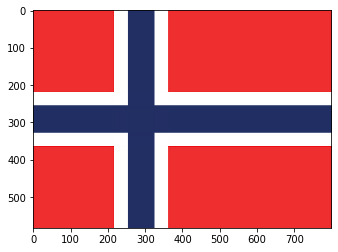

In [38]:
plt.imshow(ordered[1][2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


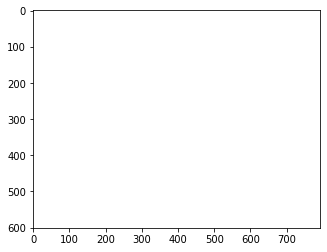

In [42]:
plt.imshow(ordered[2][2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


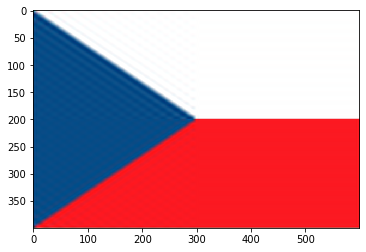

In [40]:
plt.imshow(ordered[3][2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


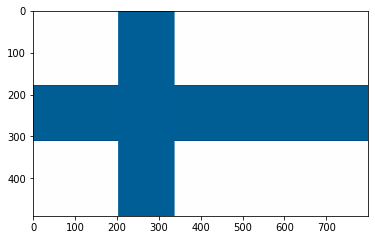

In [43]:
plt.imshow(ordered[4][2])